## Probabilistic Population Projections for the Isle of Man

### Making probabilistic migration scenaros

Next, we need to open the required R packages for bayesian population modelling and migration scenarios, and the World Population Prospects 2022 dataset.

In [19]:
library(wpp2022)
library(bayesMig)
library(bayesPop)

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




In [133]:
sim_dir <- "tmp"

calibration_iterations <- 10000
prediction_trajectories <- 1000
prediction_burnin <- 5000
n_chains <- 8

data(include_2022, package = "bayesTFR")
small_countries <- subset(include_2022, include_code == 1)$country_code

# Run 4 MCMCs 10,000 iterations each, thinned by 10
# (can take long time)
m <- run.mig.mcmc(
        annual = FALSE, # Annual can be true - BUT bayesPop is only experimental in annual mode.
        output.dir = sim_dir, nr.chains = n_chains, iter = calibration_iterations,
        thin = 10, verbose.iter = 1000, wpp.year = 2022, replace.output = FALSE,
        present.year = 2021,
        exclude.from.world = small_countries, parallel = TRUE, nr.nodes = 12)



Starting Bayesian Hierarchical Model Migration.
Initialize simulation - 8 chain(s) in total.

Results stored in tmp 

Simulation successfully finished!!!


In [137]:
# Prediction for all countries
prediction_trajectories <- 1000
prediction_burnin <- 5000

predictedMigration <-
    mig.predict(
        sim.dir = sim_dir, nr.traj = prediction_trajectories, burnin = prediction_burnin, 
        start.year = 2022,
        replace.output = FALSE, save.as.ascii = "all", use.cummulative.threshold = TRUE)

Loading chain 1 from disk. (mcmc.list[[ 1 ]]).
Loading chain 2 from disk. (mcmc.list[[ 2 ]]).
Loading chain 3 from disk. (mcmc.list[[ 3 ]]).
Loading chain 4 from disk. (mcmc.list[[ 4 ]]).
Loading chain 5 from disk. (mcmc.list[[ 5 ]]).
Loading chain 6 from disk. (mcmc.list[[ 6 ]]).
Loading chain 7 from disk. (mcmc.list[[ 7 ]]).
Loading chain 8 from disk. (mcmc.list[[ 8 ]]).

Prediction from 2022 until 2100 (i.e. 16 projections)

Migration projection trajectory  10 
Migration projection trajectory  20 
Migration projection trajectory  30 
Migration projection trajectory  40 
Migration projection trajectory  50 
Migration projection trajectory  60 
Migration projection trajectory  70 
Migration projection trajectory  80 
Migration projection trajectory  90 
Migration projection trajectory  100 
Migration projection trajectory  110 
Migration projection trajectory  120 
Migration projection trajectory  130 
Migration projection trajectory  140 
Migration projection trajectory  150 
Migrati

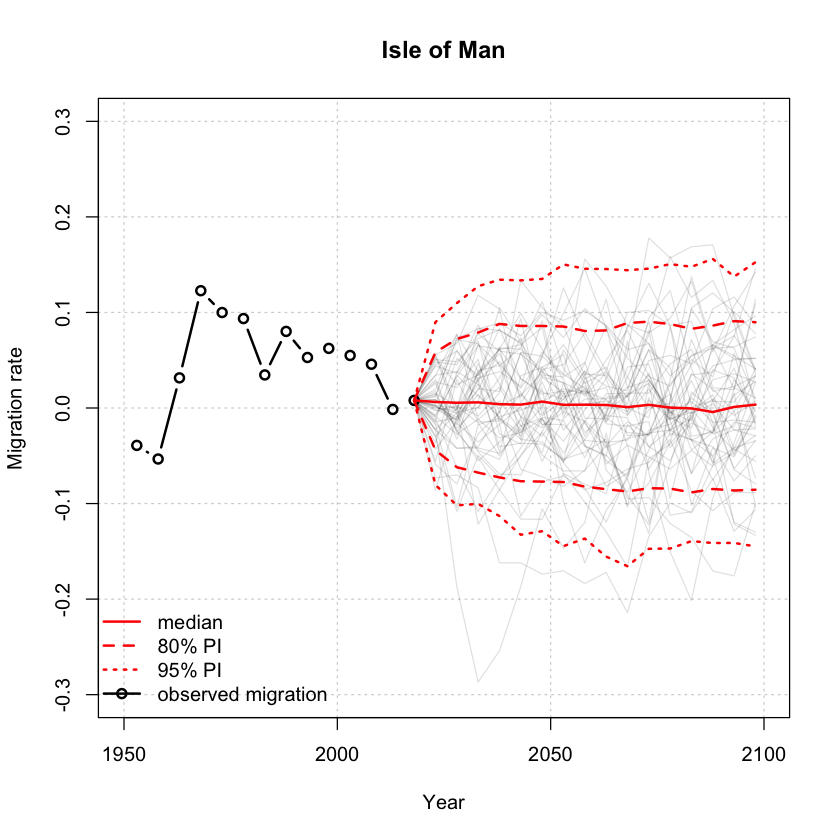

In [214]:
predictedMigration <- get.mig.prediction(sim_dir)

mig.trajectories.plot(predictedMigration, nr.traj = 50, country = "Isle of Man", mark.estimation.points = TRUE, xlim = c(1950, 2050), ylim = c(-0.3, 0.3))

#### Decomposing total migration to *age-specific migration*

The probabilistic migration model generates trajectories of total net migration. However, the Isle of Man has had a very specific age structure in the migration pattern.

Here, I create a migration schedule (age classes + male/female) by taking the median migration pattern of the past 40 years for the Isle of Man. The information is based on Government sources.

In [192]:
library(dplyr)
library(tidyr)

migtraj <- read.csv("/Users/andrewmartin/Desktop/tmp/predictions/ascii_trajectories.csv")

# move from long to wide format required by totals2age function
df <-
    migtraj %>%
    select(-Year) %>%
    filter(Trajectory == 1) %>%
    filter(LocID == 833) %>%
    pivot_wider(names_from="Period", values_from = "Mig")

df

iom_schedule_m <- c (0.329790225, 0.146049273, 0.097507477, -0.524647932, -0.330651671, 0.181259167, 0.27099312, 0.309108685, 0.254413704, 0.159723018, 0.019908973, 0.108275552, -0.0472633, 0.092892588, 0.020079895, 0.015465006, 0.018370677, 0.196300287, 0, 0, 0)

age_structured_mig <-
    migration.totals2age(df, 
    annual = FALSE, time.periods = NULL,
    schedule = iom_schedule_m, scale = 0.5, method = "rc", sex = "M",
    mig.is.rate = TRUE,
    alt.schedule.file = NULL)

age_structured_mig

# # age_structured_mig
# migtraj %>%
# group_by(Trajectory) %>%
# group_map(
#     migration.totals2age(
#     annual = FALSE, time.periods = NULL,
#     schedule = NULL, scale = 1, method = "user", sex = "M",
#     country_code = "Isle of Man", mig.is.rate = TRUE,
#     alt.schedule.file = NULL)
# )


LocID,Trajectory,2015-2020,2020-2025,2025-2030,2030-2035,2035-2040,2040-2045,2045-2050,2050-2055,2055-2060,2060-2065,2065-2070,2070-2075,2075-2080,2080-2085,2085-2090,2090-2095,2095-2100
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
833,1,0.00794,-0.07253,-0.03767,-0.01593,0.01822,0.01222,-0.03397,-0.04948,0.00507,0.03613,0.06565,0.06336,0.03989,-0.00738,0.03428,0.00142,0.06236


[1] 1.317575

age,2015-2020,2020-2025,2025-2030,2030-2035,2035-2040,2040-2045,2045-2050,2050-2055,2055-2060,2060-2065,2065-2070,2070-2075,2075-2080,2080-2085,2085-2090,2090-2095,2095-2100
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-4,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481,0.125150481
5-9,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525,0.055423525
10-14,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636,0.037002636
15-19,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080,0.199096080
20-24,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387,0.125477387
25-29,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155,0.068785155
30-34,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855,0.102837855
35-39,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144,0.117302144
40-44,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213,0.096546213


### Population Projection

We used the above probabilistic migration trajectories (ASCII format) as an input to `bayesPop` to calibrate a bayesian probalistic population model. The calibrated model was then used to make a probabilistic projection for all countries.

In [2]:
sim_dir_tfr <- "tmp_pop/TFR-nouncertainty"
sim_dir_e0 <- "tmp_pop/e0"
sim_dir_pop <- "tmp_pop/pop"
seed <- 1706228048 # to generate reproducable result

# Phase II MCMCs - Total Fertility Rate (TFR)
tfr_phase_2 <- run.tfr.mcmc(
    iter = "auto", output.dir = sim_dir_tfr, verbose = TRUE,
    wpp.year = 2022, annual = FALSE, replace.output = FALSE, thin = 100, uncertainty = FALSE,
    use.wpp.data = TRUE, parallel = TRUE, seed = seed)

In [ ]:
seed_phase_3 <- -114177612 # to generate reproducable result

# Phase III MCMCs - Total Fertility Rate
tfr_phase_3 <- run.tfr3.mcmc(sim_dir_tfr,
    nr.chains = 3, iter = "auto", verbose = TRUE,
    replace.output = FALSE, thin = 100,
    parallel = TRUE, seed = seed)

Next, we predict the TFR using the calibrated global TFR model.

In [237]:
sim_dir_tfr <- "tmp_pop/TFR"
sim_dir_pop <- "tmp_pop/pop"

# Predict TFR (if iter above < 4000, reduce burnin and nr.traj accordingly)
tfr.predict(sim.dir = sim_dir_tfr, nr.traj = 2000, burnin = 2000)

Loading chain 1 from disk. (mcmc.list[[ 1 ]]).
Loading chain 2 from disk. (mcmc.list[[ 2 ]]).
Loading chain 3 from disk. (mcmc.list[[ 3 ]]).

AR(1) simulated using phase III MCMCs.

Prediction from 2025 until 2100 (i.e. 16 projections)



Warning message in make.tfr.prediction(mcmc.set, end.year = end.year, replace.output = replace.output, :
"nr.traj is larger than the available MCMC sample. Only 240 trajectories will be generated."



Storing thinned mcmc:
Storing country-independent parameters ...done.
Storing country-specific parameters ...done.
Storing country-specific parameters for extra countries ...done.
Load variance parameters.
Load parameters mean_eps_tau and sd_eps_tau.
Load hierarchical parameters.
Load country-specific parameters.
TFR projection trajectory  2 
TFR projection trajectory  4 
TFR projection trajectory  6 
TFR projection trajectory  8 
TFR projection trajectory  10 
TFR projection trajectory  12 
TFR projection trajectory  14 
TFR projection trajectory  16 
TFR projection trajectory  18 
TFR projection trajectory  20 
TFR projection trajectory  22 
TFR projection trajectory  24 
TFR projection trajectory  26 
TFR projection trajectory  28 
TFR projection trajectory  30 
TFR projection trajectory  32 
TFR projection trajectory  34 
TFR projection trajectory  36 
TFR projection trajectory  38 
TFR projection trajectory  40 
TFR projection trajectory  42 
TFR projection trajectory  44 
TFR pr

: 

#### Life expectancy

We used the `bayesLife` package to generate life expectancy predictions using the WPP 2022 dataset. 

In [ ]:
seed_life_run_f <- 1196853695 # to generate reproducable result
sim_dir_e0_f <- "tmp_pop/e0_f"

life_ex_f <- bayesLife::run.e0.mcmc(
    sex = 'F', nr.chains = 5, iter = "auto", seed = seed_life_run_f,
    parallel = TRUE, wpp.year = 2022,
    thin = 10, output.dir = sim_dir_e0_f, verbose = TRUE)

In [5]:
seed_life_run_m <- 1206353596 # to generate reproducable result
sim_dir_e0_f <- "tmp_pop/e0_f"

life_pred_mf <-
    e0.predict(mcmc.set = NULL, end.year = 2100,
    sim.dir = sim_dir_e0_f, replace.output = FALSE,
    predict.jmale = TRUE, burnin = 10000,
    low.memory = TRUE,
    ignore.last.observed = FALSE, seed = seed_life_run_m, verbose = TRUE)


In [3]:
sim_dir_e0_f <- "tmp_pop/e0_f"
life_pred_mf <- get.e0.prediction(sim_dir_e0_f)

e0.trajectories.plot(life_pred_mf, country = "Isle of Man")

Warning message in get.e0.prediction(sim_dir_e0_f):
"File tmp_pop/e0_f/predictions/prediction.rda does not exist."


ERROR: Error in e0.trajectories.plot(life_pred_mf, country = "Isle of Man"): Country Isle of Man not found.


### Questions

#### Q1. How does the probabilistic projection differ from the IOMG projection?

The IOMG projection applies the 40-year mean migration trend (*unsure of year range: 1981 - 2021?*) - in terms of age and sex structure - to their calibrated model to predict future population size. Here, I similarly apply the long-term 40 year migration trend (1976 - 2016) to the probabilistic calibrated model to compare projections between the approaches.

I apply the long-term migration pattern in two ways:

1. applying the mean long-term net migration *total* (i.e. *n* persons) and its age and sex structure; and

2. applying the median model-inferred net migration *rate* (i.e. the median from the bayesian migration model) to the Island's long-term age and sex structure.


In [25]:
# setwd("~/Desktop/")

# 1. Apply IOM long-term migration totals as future projection.
all_mig_M_40Y <- "iom-data/migrationM-8121.txt" # 1981 - 2021
all_mig_F_40Y <- "iom-data/migrationF-8121.txt" # 1981 - 2021
# all_mig_M_40Y <- "iom-data/migrationM.txt" # 1976 - 2016
# all_mig_F_40Y <- "iom-data/migrationF.txt" # 1976 - 2016

sim_dir_pop_dtm <- "tmp_pop/pop_deterministic_40y"
sim_dir_tfr <- "tmp_pop/TFR"
sim_dir_e0_f <- "tmp_pop/e0_f"

pred_40y_deterministic <- pop.predict(
    inputs = list(
        migM = all_mig_M_40Y,
        migF = all_mig_F_40Y,
        tfr.sim.dir = sim_dir_tfr,
        e0F.sim.dir = sim_dir_e0_f,
        e0M.sim.dir =  "joint_"
    ),
    mig.is.rate = FALSE, keep.vital.events = TRUE,
    present.year = 2020,
    wpp.year = 2022, countries = c("Isle of Man"), output.dir = sim_dir_pop_dtm,
    annual = FALSE, nr.traj = 1000, replace.output = TRUE)

Loading  UNlocations  from  wpp2022 .

Progress:  0 %; now processing  833   Isle of Man : 1000  trajectories, mx via  LC,
Prediction stored into tmp_pop/pop_deterministic_40y/predictions 


[1] "Population at 2040:"


median    0.025      0.1      0.9    0.975 
87.07381 82.50126 83.90967 89.69030 91.40230

,median,0.025,0.1,0.9,0.975
1950,54.95600,NA,NA,NA,NA
1955,52.59400,NA,NA,NA,NA
1960,49.18600,NA,NA,NA,NA
1965,49.82700,NA,NA,NA,NA
1970,54.69200,NA,NA,NA,NA
1975,59.58900,NA,NA,NA,NA
1980,63.59700,NA,NA,NA,NA
1985,64.44400,NA,NA,NA,NA
1990,68.29400,NA,NA,NA,NA
1995,71.28100,NA,NA,NA,NA


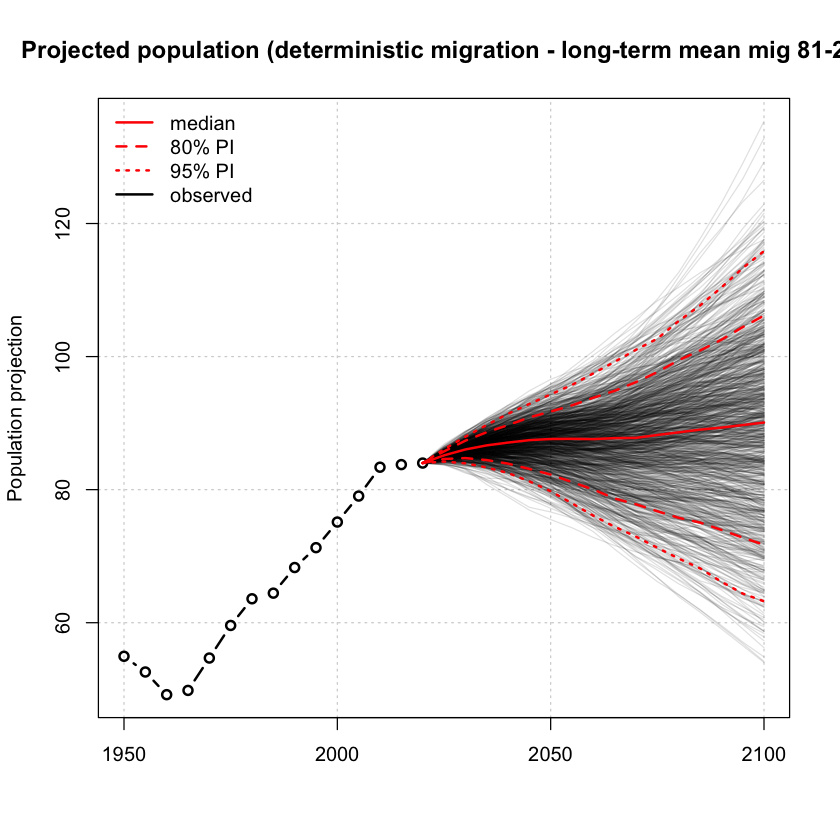

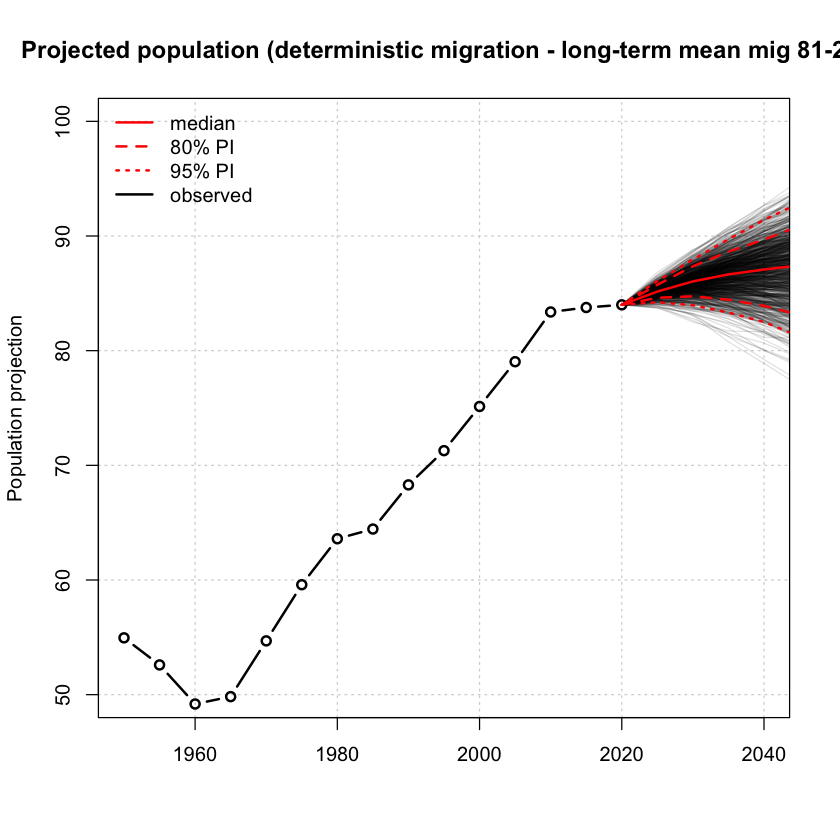

In [28]:
sim_dir_pop_dtm <- "tmp_pop/pop_deterministic_40y"
pred_40y_deterministic <- bayesPop::get.pop.prediction(sim_dir_pop_dtm)

print("Population at 2040:")
pop.trajectories.table(pred_40y_deterministic, country="Isle of Man")['2040', ]

pop.trajectories.table(pred_40y_deterministic, country="Isle of Man")

pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", pi=c(80, 95), main = "Projected population (deterministic migration - long-term mean mig 81-21)")

pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", pi=c(80, 95), xlim= c(1950, 2040), ylim = c(50, 100), main = "Projected population (deterministic migration - long-term mean mig 81-21)")

The present analysis represents a repeat of the analysis conducted for The Area Plan for the East (TAPE) public inquiry, which was completed before the most recent 2021 census.

Comparison of the previous population projection with a deterministic migration trend (40 year long-term median; 480 persons per year) to this updated projection indicates that:

* By 2037, the population is projected to be 3,170 persons smaller than it was projected previously. 
* The projection indicates that Government will fall short of its 100,000 population target by nearly 12,000 people.

The current (2020) population pyramid indicates that there is a large bulk between 40 and 60 years of age, who are about to retire. The scale of this bulk is 

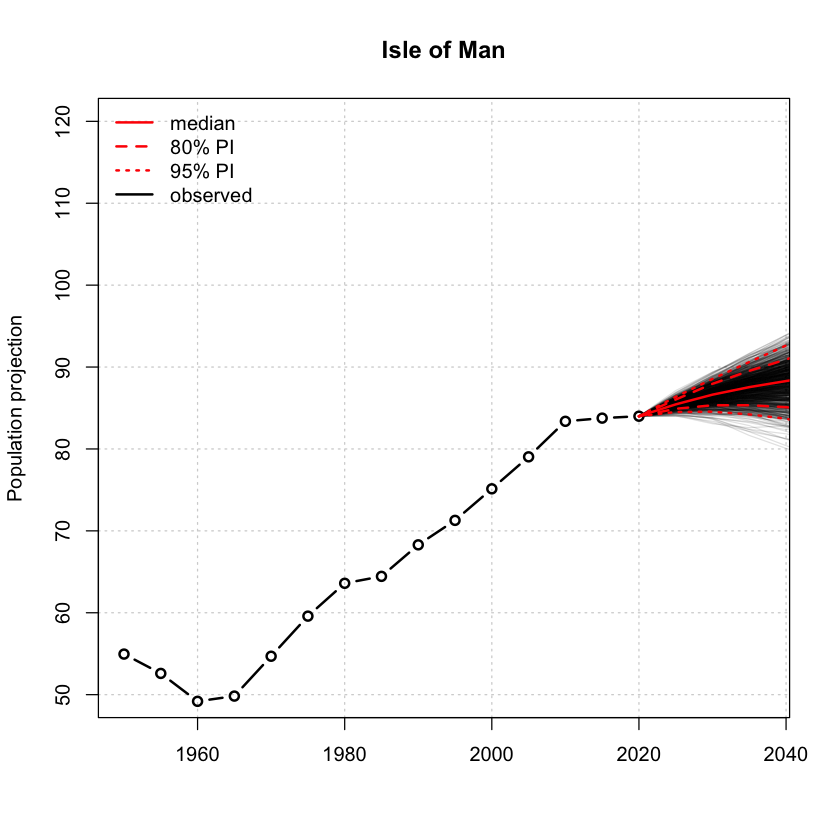

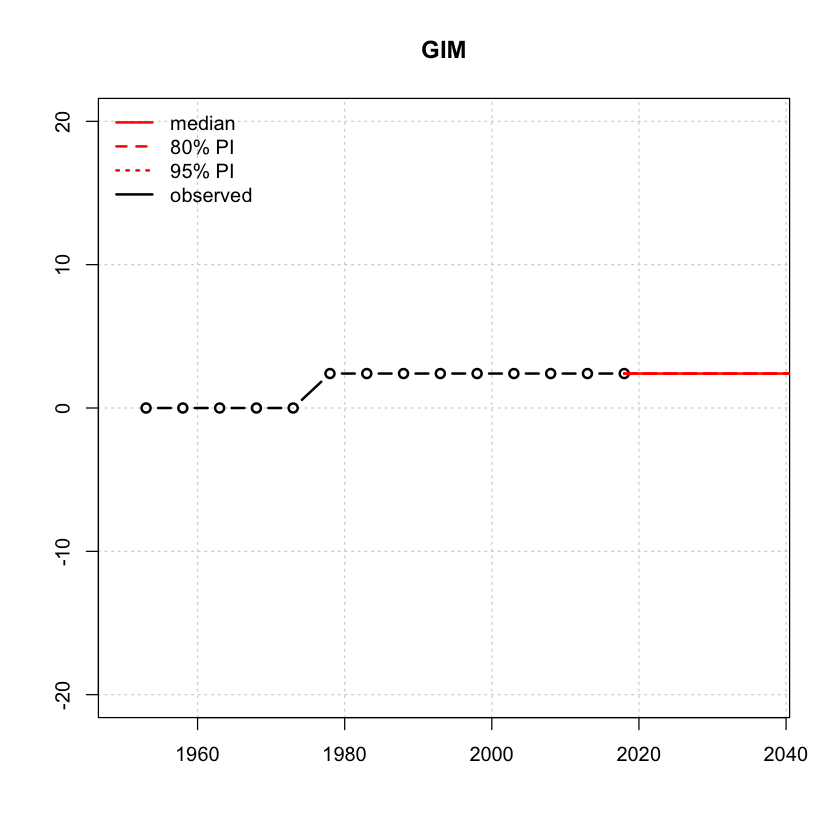

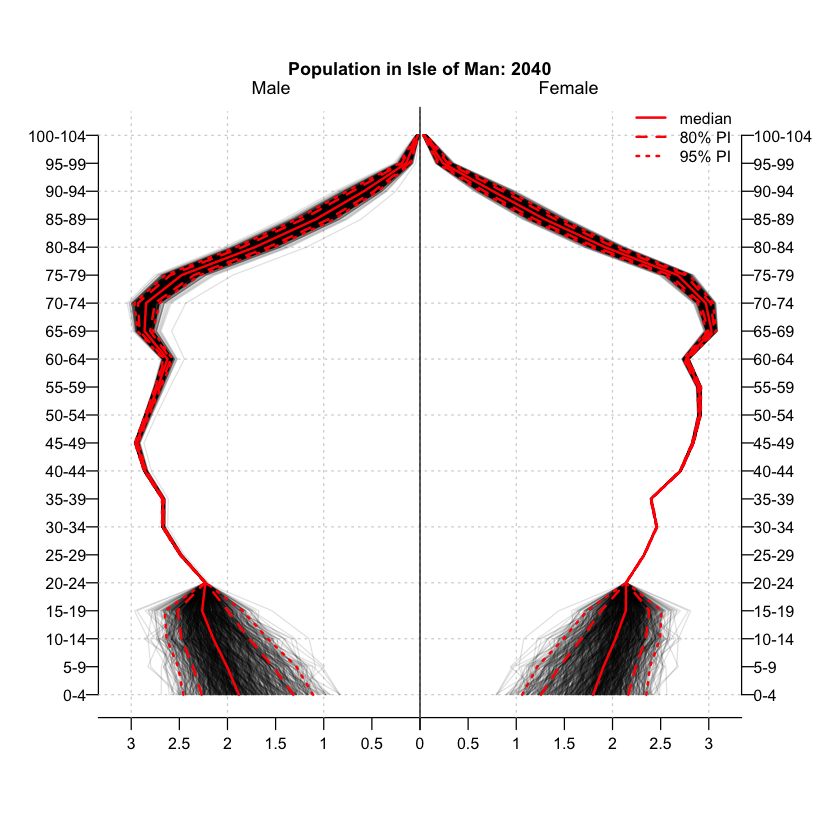

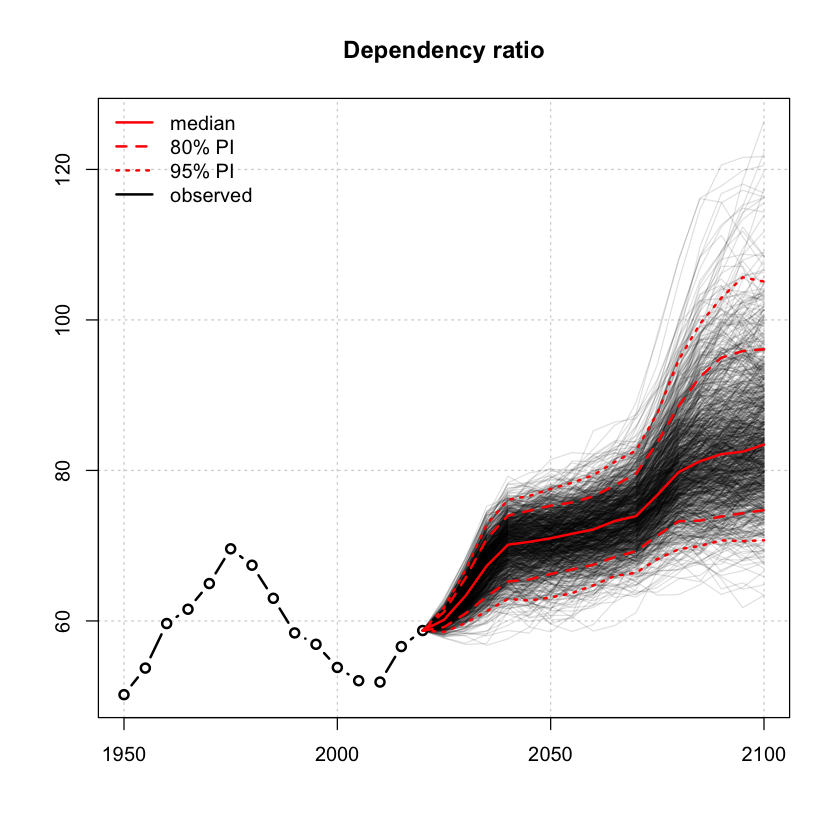

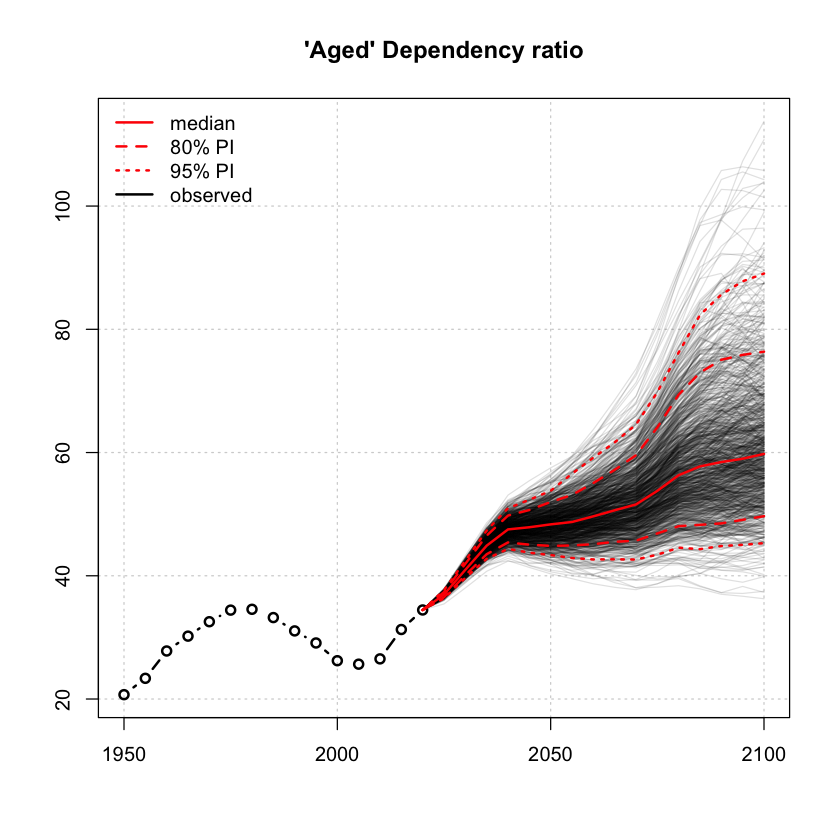

In [11]:
# What are the birth vs death rates projected to look like?
pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", pi=c(80, 95), xlim=c(1950, 2037), ylim=c(50,120))

pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", pi=c(80, 95), expression = "GIM", xlim=c(1950,2037), ylim=c(-20,20))

pop.trajectories.pyramid(pred_40y_deterministic, country="Isle of Man",pi = c(80, 95), year = 2040)

pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", expression = "(PIM[1:3] + PIM[14:27]) / PIM[4:13] * 100", pi=c(80, 95), main = "Dependency ratio")

pop.trajectories.plot(pred_40y_deterministic, country="Isle of Man", expression = "(PIM[14:27]) / PIM[4:13] * 100", pi=c(80, 95), main = "'Aged' Dependency ratio")

#### Population projections

Finally, we combined the TFR, life expectancy, and migration data to make population projections until 2100.

In [217]:
mig_for_bayesPop <- "/Users/andrewmartin/Desktop/tmp/predictions/ascii_trajectories.csv"

library(bayesPop)

pred <- pop.predict(
    inputs = list(
        migtraj = mig_for_bayesPop
    ),
    mig.is.rate = TRUE, keep.vital.events = TRUE,
    present.year = 2020,
    wpp.year = 2022, countries = c("Finland", "Isle of Man"), output.dir = "sim_dir_pop",
    annual = FALSE, nr.traj = 1000, mig.age.method = "un", replace.output = FALSE)

# # mig.age.method = "user" :
# # mig.alt.age.schedule can then be used to set a user-specified age-specific migration.
# # We could use this to generate automatic age-specific profiles (based on proposed policy nudges)
# # and then optimise the outcome (e.g. by 2037) to minimise the dependency ratio.



Loading  UNlocations  from  wpp2022 .

Loading  /Users/andrewmartin/Desktop/tmp/predictions/ascii_trajectories.csv
Progress:  0 %; now processing  246   Finland : 1000  trajectories, mx via  LC,
Progress:  50 %; now processing  833   Isle of Man : 1000  trajectories, mx via  LC,
Prediction stored into sim_dir_pop/predictions 


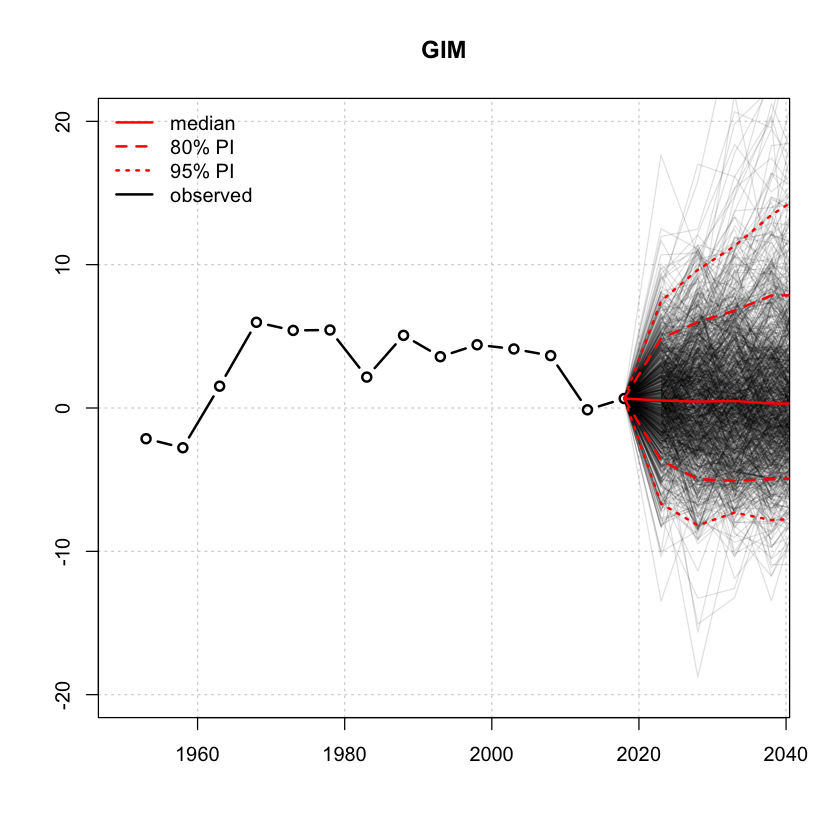

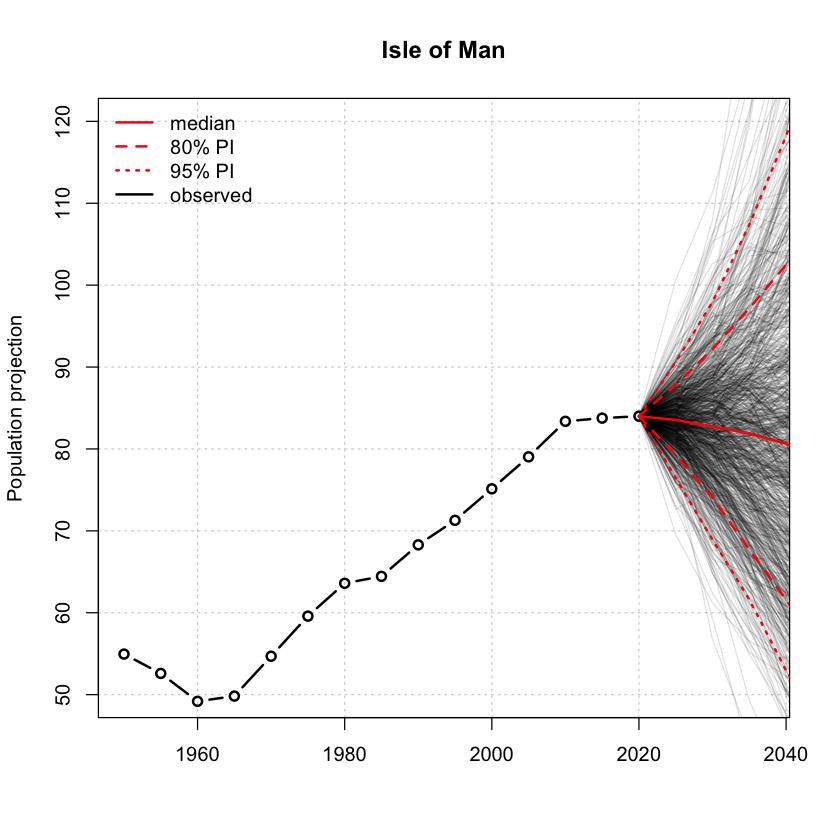

,median,0.025,0.1,0.9,0.975
1950,54.95600,NA,NA,NA,NA
1955,52.59400,NA,NA,NA,NA
1960,49.18600,NA,NA,NA,NA
1965,49.82700,NA,NA,NA,NA
1970,54.69200,NA,NA,NA,NA
1975,59.58900,NA,NA,NA,NA
1980,63.59700,NA,NA,NA,NA
1985,64.44400,NA,NA,NA,NA
1990,68.29400,NA,NA,NA,NA
1995,71.28100,NA,NA,NA,NA


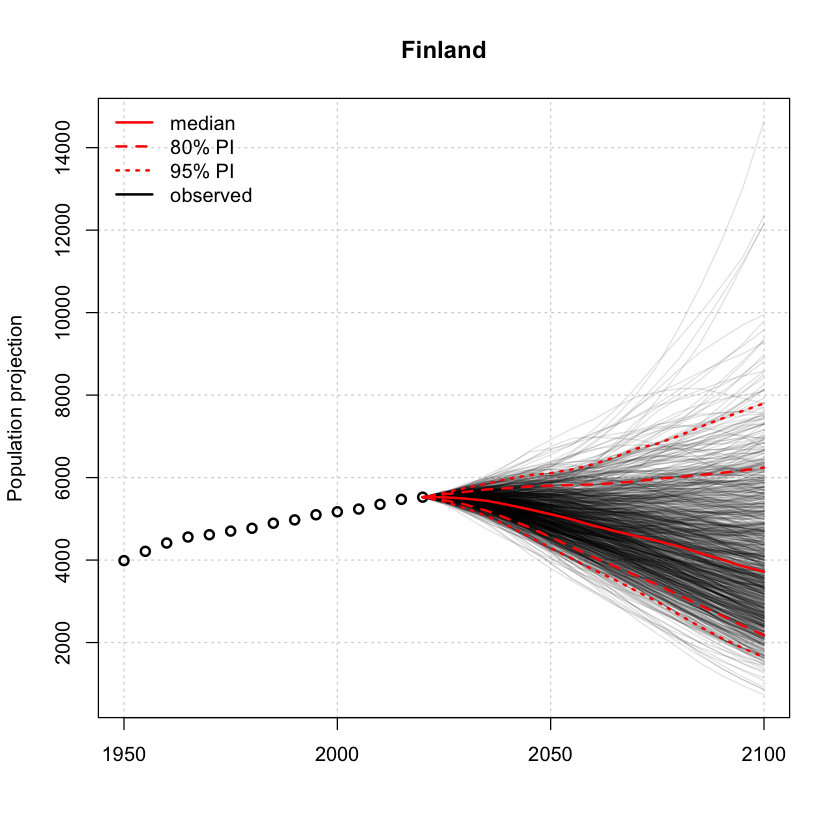

In [221]:
pop.trajectories.plot(pred, country="Isle of Man", pi=c(80, 95), expression = "GIM", xlim=c(1950,2037), ylim=c(-20,20))

pop.trajectories.plot(pred, country="Isle of Man", pi=c(80, 95), expression = "GIM", xlim=c(1950,2037), ylim=c(-20,20))

pop.trajectories.plot(pred, country="Isle of Man", pi=c(80, 95), xlim=c(1950, 2037), ylim=c(50,120))
pop.trajectories.plot(pred, country="Finland", pi=c(80, 95))
pop.trajectories.table(pred, country="Isle of Man")


# migAll <- get.pop.ex("GIM", pred)
# plot.ts(migAll[,20, drop=FALSE])

# hist(colSums(migAll), breaks = 100)

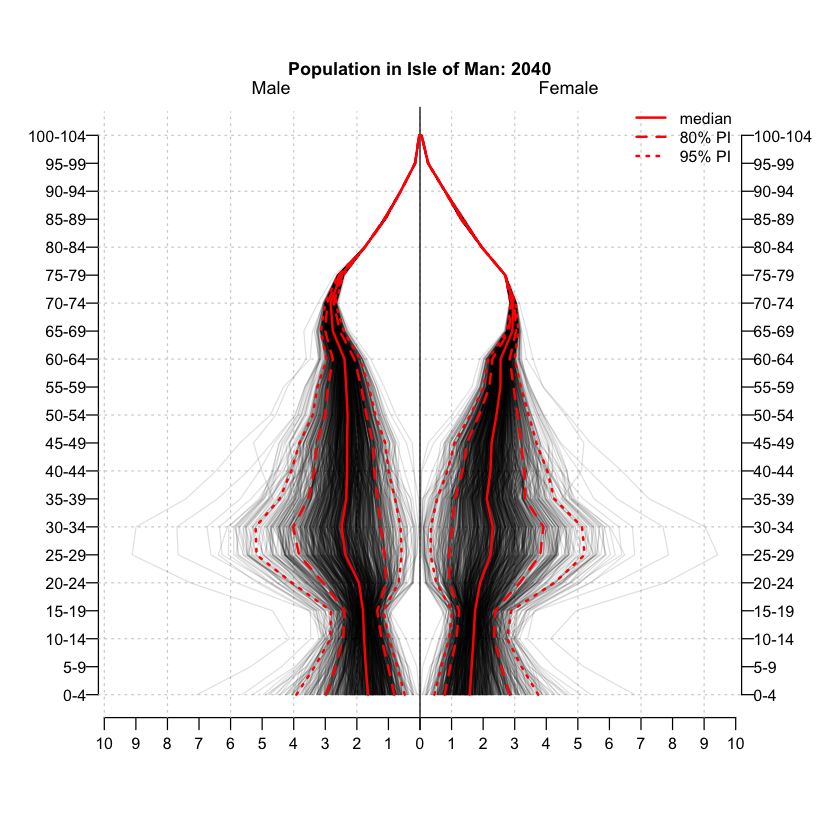

In [108]:
pop.trajectories.pyramid(pred, country = "Isle of Man", year = 2037)

### Optimisation of migration pattern to minimise dependency ratio

The ultimate aim of Government policy is to minimise the dependency ratio such that key services can be maintained by applying an adequate tax base. However, the policy that Government have instigated to achieve this - increasing the population to 100,000 - may not be the optimal method to achieve this.

Here, we sought to determine the most appropriate age structure that would minimise the dependency ratio by 2037 (the Government's target year). The dependency ratio is determined by the expression: ``"(PIM[1:3] + PIM[14:27]) / PIM[4:13] * 100"``.

However, it would be better to determine the retirement age at the top of the dependency ratio as a tailed distribution following e.g. age 60.

Varying components represented in the model to optimise:

* A Pareto distribution representing the proportion of those over retirement age who carry on working.
    - aplha: positive only (shape)
    - Xm: positive only (scale)

* Positive / negative pressure(s) on the age-structured migration totals. Maybe start with simple approach.
    - Normal or other distribution to represent a policy effect e.g. 2-param.
    - Policy may add migration to a particular part of the curve.

Two plausable approaches to take are:

1. Optimise a pareto front based on population size <-> dependency ratio (as a cumulation over all times).
2. Optimise a single objective function that minimises the *number* of dependents (as a cumulation over all times).


In [18]:
# library(GA)
library(bayesPop)
library(extraDistr)
library(dplyr)

setwd("/Users/andrewmartin/Desktop")

tmp_objective_dir <- "tmp/objective"
all_mig_m_40y <- "iom-data/migrationM.txt"
all_mig_f_40y <- "iom-data/migrationF.txt"

real_mig_m <- read.csv(all_mig_m_40y, sep = "\t")
real_mig_f <- read.csv(all_mig_f_40y, sep = "\t")

# make some fake people with their ages based on distribution
rnorm(100, 24, 10)

m <- real_mig_m[1:21, 9]
f <- real_mig_f[1:21, 9]

m
f

# fitness_fn <- function(x, pareto_scale, pareto_location) {

#   # 1. Modify 'real' migration pattern based on parameter values
#   # - what is a realistic quantity of increase (minimum of 10% or 100)


#   # 2. Make a prediction based on current migration schedules
#   this_pred <- pop.predict(
#                            inputs = list(
#                              migM = all_mig_M_40Y,
#                              migF = all_mig_F_40Y,
#                              tfr.sim.dir = sim_dir_tfr),
#                            mig.is.rate = FALSE, keep.vital.events = TRUE,
#                            present.year = 2020,
#                            wpp.year = 2022, countries = c("Isle of Man"),
#                            output.dir = tmp_objective_dir,
#                            annual = FALSE, nr.traj = 1000,
#                            replace.output = FALSE)
    
#   # 3. Calculate dependency ratio and population size for 2040
  
#   # Proportion of people in each 65-69, etc. group that are 'in work'
#   # based on the parameter values.
#   # Working after 65 - proportion of each 5 year age class.
#   working_after_65 <- rpareto(100, pareto_scale, pareto_location)

#   dep_ratio_2040 <- 
#     pop.trajectories.table(
#                            this_pred,
#                            country = "Isle of Man",
#                            expression = "(PIM[1:3] + PIM[14:27]) / PIM[4:13] * 100")['2040', 'median']

#     # Pareto optimality of outcomes
#     dep_ratio_2040
# }

# genetic_output <- 
#     ga(
#         type = "real-valued", 
#         fitness = fitness_fn,
#         lower = c(-5.12, -5.12), upper = c(5.12, 5.12),
#         popSize = 50, maxiter = 1000, run = 100)

# objective()

[1] 16.165601 30.745219 16.778413 24.110490 20.933967 29.411373 22.228656
  [8] 23.071088 21.066435 21.200704 43.026572 11.243506 15.385627 23.947290
 [15] 21.230588 19.228185 34.537887 27.890209 33.757593 20.352174  9.957186
 [22] 44.276810 21.118735 21.750806 35.724233 21.750074 27.655452 33.104673
 [29] 14.665389 18.632042 19.183117 13.324098 12.909720 12.806972 25.000873
 [36] 33.431836 23.997794 29.194510  2.315082 29.414492 29.103881 35.548035
 [43] 13.791184 16.061114 10.806721 30.258339 17.652956 21.306160 23.572136
 [50] 20.539126 22.150559 42.436669 15.556649 12.405865 36.441494 23.550712
 [57] 43.294301 31.713680 31.544271 13.454028 38.090297 32.401998 15.009897
 [64] 27.387779 24.702931  6.823268 39.058082 37.191330 13.828980 17.276896
 [71] 24.650187 25.920034 45.570190 14.724579 19.431584 42.778967 10.166027
 [78] 20.944222  4.379946 33.233330 15.719205  9.993467 22.471367 23.331931
 [85] 28.701469 24.921248 15.109244 18.013901 14.531692 35.581545 17.530158
 [92] 36.541524 20.381394 17.035097 11.711416 20.489392 26.057627 17.828585
 [99] 29.589781 35.803662

[1]  0.000000000  0.165012180  0.165488352  0.088824675 -0.057994994
 [6]  0.023430401  0.208185099  0.215168953  0.179138613  0.136441866
[11]  0.094062566  0.048826236  0.007558004  0.000000000  0.000000000
[16]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[21]  0.000000000

[1]  0.000000000  0.146296509  0.146718673  0.078750186 -0.051417206
 [6]  0.020772926  0.184572758  0.190764504  0.158820723  0.120966638
[11]  0.083393996  0.043288367  0.006700776  0.000000000  0.000000000
[16]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[21]  0.000000000